In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from IPython.display import display

%matplotlib inline

sns.set(font="simhei")

特情数据

In [142]:
train_s = pd.read_csv('input/train/special-case.csv')
display(train_s.head())
train_s.info()

,Airport,CTime,STime,ETime,Content
0,csx,2015-04-30 19:52:45Z,2015-05-01 12:00:00Z,2015-05-01 16:00:00Z,长沙机场航班延误黄色预警提示：预计明日（5月1日）12:00-16:00长沙黄花机场受雷雨天...
1,wuh,2015-05-01 08:13:39Z,2015-05-01 08:00:00Z,2015-05-01 12:00:00Z,目前，8时-12时雷雨，期间进出港航班可能受到影响。
2,khn,2015-05-01 08:14:18Z,2015-05-01 14:00:00Z,2015-05-01 17:00:00Z,预计，14时-17时小雷雨，期间进出港航班可能受到影响。
3,swa,2015-05-01 08:24:28Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。
4,zha,2015-05-01 08:24:56Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 5 columns):
Airport    15877 non-null object
CTime      15869 non-null object
STime      15869 non-null object
ETime      15862 non-null object
Content    15868 non-null object
dtypes: object(5)
memory usage: 620.4+ KB


时间转成int，机场名大写

In [150]:
train_s.dropna(axis=0, inplace=True)

train_s['CTime'] = pd.to_datetime(train_s['CTime']).astype(np.int64) // 10 ** 9
train_s['STime'] = pd.to_datetime(train_s['STime']).astype(np.int64) // 10 ** 9
train_s['ETime'] = pd.to_datetime(train_s['ETime']).astype(np.int64) // 10 ** 9

train_s.sort_values(['Airport', 'STime', 'ETime'], ascending=True, inplace=True)

train_s['Airport'] = train_s['Airport'].str.upper()

train_s.head()

,Airport,CTime,STime,ETime,Content
7063,ACX,1467573963,1467572400,1467576000,目前兴义机场有小雨雷，期间进出港航班可能会受到影响。
7080,ACX,1467620784,1467619200,1467626400,目前，兴义机场有雾，低云，期间进出港航班可能会受到影响。
6784,AHJ,1467008145,1467007200,1467014400,目前阿坝机场有雾，能见度600米，期间进出港航班可能会受到影响。
6621,AKU,1466544316,1466544000,1466550000,目前阿克苏机场有雷，期间进出港航班可能会受到影响。
6540,AQG,1466324409,1466323200,1466334000,目前安庆机场有雷雨，期间进出港航班可能会受到影响。


航班数据

In [110]:
train_1705 = pd.read_csv('input/train/fights-2017-05.csv')

display(train_1705.head())
train_1705.info()

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel
0,PVG,CKG,9C8867,1495602600,1495613700,1.495605e+09,1.495613e+09,2798.0,正常
1,CAN,TAO,HU7275,1493947200,1493958600,1.493948e+09,1.493958e+09,1479.0,正常
2,KWE,KMG,GJ8661,1494775200,1494779400,1.494783e+09,1.494787e+09,2957.0,正常
3,WNZ,CSX,CZ6956,1495185600,1495191300,1.495188e+09,1.495193e+09,419.0,正常
4,ENH,WUH,CZ3841,1494460800,1494465000,1.494471e+09,1.494474e+09,1421.0,正常


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326557 entries, 0 to 326556
Data columns (total 9 columns):
Departure         326557 non-null object
Destination       326557 non-null object
FLTNo             326557 non-null object
PDepartureTime    326557 non-null int64
PArrivalTime      326557 non-null int64
ADepartureTime    317996 non-null float64
AArrivalTime      317875 non-null float64
Id                322561 non-null float64
IsCancel          326557 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 22.4+ MB


In [225]:
train_1705.sort_values(['Departure', 'PDepartureTime'], ascending=True, inplace=True)

train_1705['Delay'] = (train_1705['ADepartureTime'] - train_1705['PDepartureTime']) / 60

train_1705['DelayRange'] = pd.cut(train_1705['Delay'], [0, 10, 20, 30, 60, 120, 180, 300, 720, 1440, np.inf], 
                                  labels=['0-10', '10-20', '20-30', '30-60', '60-120', '120-180', '180-300', '300-720', '720-1440', '1440-inf'])
train_1705['DelayRange'].fillna("1440-inf", inplace=True) # nan值代表航班取消

train_1705.head()

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel,IsSpecial,Delay,DelayRange,Msg,STime,ETime,CurSpecial
300856,AAT,URC,CZ6844,1494136200,1494139800,NaN,NaN,NaN,取消,False,NaN,1440-inf,NaN,NaN,NaN,NaN
169467,AAT,AKU,UQ2004,1496068500,1496074200,NaN,NaN,NaN,取消,False,NaN,1440-inf,NaN,NaN,NaN,NaN
118525,ACX,KWE,G52930,1493602500,1493605200,1.493602e+09,1.493604e+09,1112.0,正常,False,-11.0,1440-inf,NaN,NaN,NaN,NaN
1428,ACX,SHA,MU5817,1493607900,1493618100,1.493609e+09,1.493617e+09,1336.0,正常,False,15.0,10-20,NaN,NaN,NaN,NaN
271661,ACX,KWE,G52610,1493609700,1493612100,1.493609e+09,1.493611e+09,834.0,正常,False,-5.0,1440-inf,NaN,NaN,NaN,NaN


In [212]:
train_1705['DelayRange'].value_counts()

0-10        69045
10-20       64463
30-60       49311
1440-inf    49094
20-30       36480
60-120      34479
120-180     13042
180-300      8172
300-720      2414
720-1440       57
Name: DelayRange, dtype: int64

将特情信息合并进航班信息。每条航班增加如下字段：

- IsSpecial 标记该航班是否在特情范围内
- Msg 特情消息
- STime 特情开始时间
- ETime 特情结束时间

In [213]:
train_1705.loc[:, 'IsSpecial'] = False

maxPTime = train_1705['PDepartureTime'].max()
minPTime = train_1705['PDepartureTime'].min()
train_s2 = train_s[(train_s['STime'] >= minPTime) & (train_s['ETime'] <= maxPTime)]

for i, row in train_s2.iterrows():
    if last_ariport != row['Airport']:
        last_ariport = row['Airport']
        idx = train_1705.loc[train_1705['Departure'] == row['Airport'], :].index
        
    is_in = ((train_1705.loc[idx, 'PDepartureTime'] >= row['STime']) & (train_1705.loc[idx, 'PDepartureTime'] <= row['ETime']))
    
    
    train_1705.loc[idx, 'IsSpecial'] = train_1705.loc[idx, 'IsSpecial'] | is_in
    
    train_1705.loc[is_in[is_in==True].index, 'Msg'] = row['Content']
    train_1705.loc[is_in[is_in==True].index, 'STime'] = row['STime']
    train_1705.loc[is_in[is_in==True].index, 'ETime'] = row['ETime']
    train_1705.loc[is_in[is_in==True].index, 'CurSpecial'] = (row['STime'] >= row['CTime'])


In [215]:
train_1705[train_1705['IsSpecial'] == True].head()

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel,IsSpecial,Delay,DelayRange,Msg,STime,ETime,CurSpecial
8289,CAN,WUX,MU2928,1493823600,1493833200,1.493825e+09,1.493832e+09,1142.0,正常,True,28.0,20-30,5月3日，广州管制区空域繁忙至17:50。【空中交通网】,1.493823e+09,1.493834e+09,False
239378,CAN,DYG,CZ3381,1493823600,1493829600,NaN,NaN,1033.0,取消,True,NaN,1440-inf,5月3日，广州管制区空域繁忙至17:50。【空中交通网】,1.493823e+09,1.493834e+09,False
270356,CAN,ZHA,CZ3329,1493823600,1493829000,1.493824e+09,1.493827e+09,937.0,正常,True,1.0,0-10,5月3日，广州管制区空域繁忙至17:50。【空中交通网】,1.493823e+09,1.493834e+09,False
77430,CAN,CKG,PN6206,1493823900,1493831400,NaN,NaN,491.0,取消,True,NaN,1440-inf,5月3日，广州管制区空域繁忙至17:50。【空中交通网】,1.493823e+09,1.493834e+09,False
163750,CAN,NKG,CZ3871,1493823900,1493832300,1.493826e+09,1.493840e+09,1662.0,正常,True,32.0,30-60,5月3日，广州管制区空域繁忙至17:50。【空中交通网】,1.493823e+09,1.493834e+09,False


延误时间分布

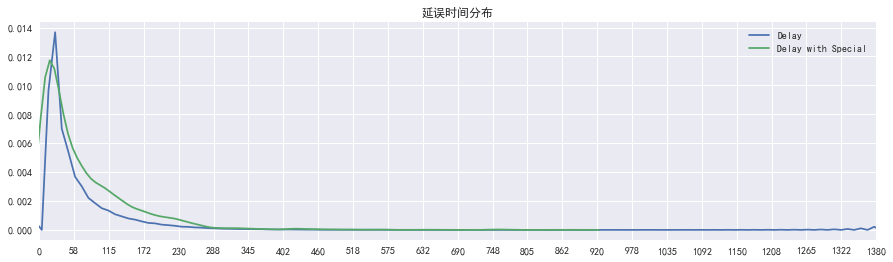

In [217]:
plt.figure(figsize=(15, 4))
g = sns.kdeplot(train_1705.loc[((~train_1705['Delay'].isnull()) & (train_1705['Delay'] > 0)), 'Delay'])
g2 = sns.kdeplot(train_1705.loc[((~train_1705['Delay'].isnull()) & (train_1705['Delay'] > 0) & (train_1705['IsSpecial'] == True)), 'Delay'], label='Delay with Special')
g.set_xlim(0, train_1705['Delay'].max())
g.set_title('延误时间分布')
g.xaxis.set_major_locator(ticker.LinearLocator(25))

绘制每个延误时间段的情况。区分所有数据、带特情的数据。

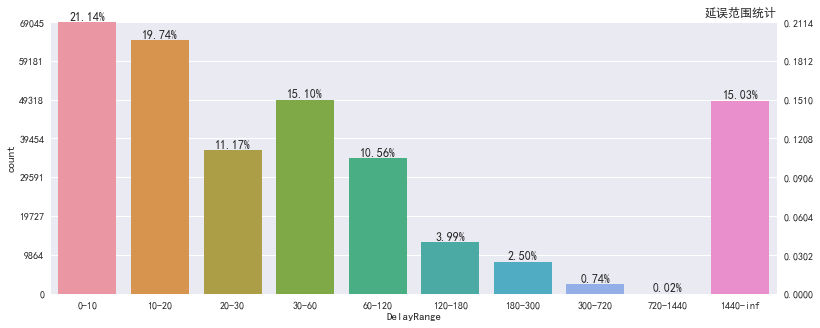

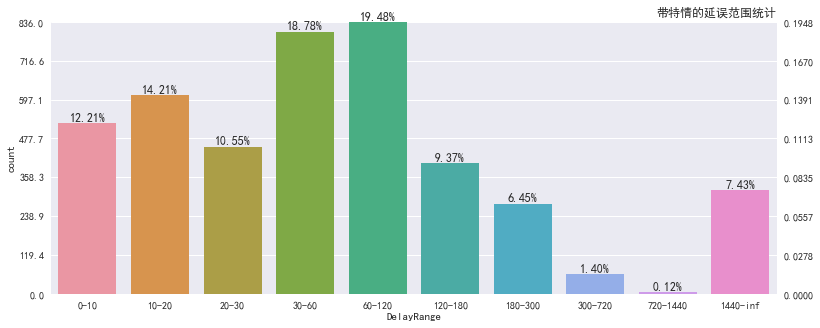

In [224]:
def plot_count_and_percentage(data, title='', t=8):
    plt.figure(figsize=(13, 5))
    g = sns.countplot(data)
    ncount = len(data)
    max_y = 0

    for p in g.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        max_y = max_y if max_y >= y else y
        g.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
    
    if title != '':
        g.set_title(title, loc='right')

    g.set_ylim(0, max_y)
    g.yaxis.set_major_locator(ticker.LinearLocator(t))
    
    g2 = g.twinx()
    g2.grid(None)
    g2.set_ylim(0, max_y/ncount)
    g2.yaxis.set_major_locator(ticker.LinearLocator(t))
    
plot_count_and_percentage(train_1705['DelayRange'], '延误范围统计')
plot_count_and_percentage(train_1705.loc[train_1705['IsSpecial'] == True, 'DelayRange'], '带特情的延误范围统计')

绘制带特情数据的延误时间段的情况。区分特情的类型：“预计”、“目前”。

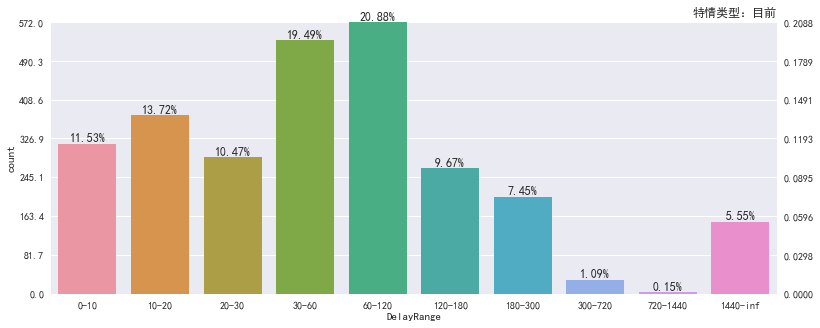

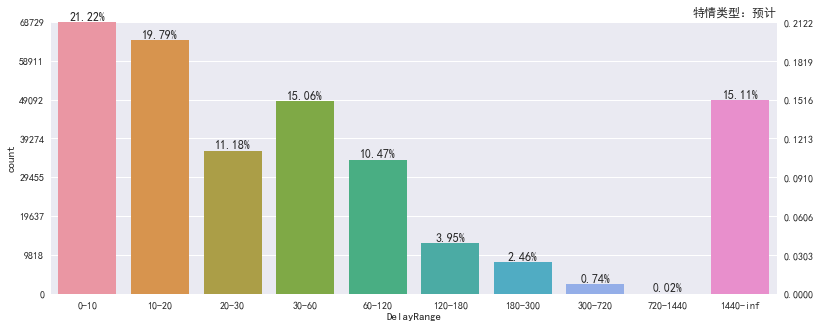

In [230]:
plot_count_and_percentage(train_1705.loc[train_1705['CurSpecial'] == True, 'DelayRange'], '特情类型：目前')
plot_count_and_percentage(train_1705.loc[train_1705['CurSpecial'] != True, 'DelayRange'], '特情类型：预计')

航班与它前几天的延误关系

航班与在它前面起飞航班的延误关系